In [1]:
from rbpnet import models

In [5]:
model = models.load_model('models/PRPF8_HepG2.model.h5')
model.summary()

Model: "RBPNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence (InputLayer)       [(None, None, 4)]            0         []                            
                                                                                                  
 first_layer_conv (FirstLay  (None, None, 128)            6272      ['sequence[0][0]']            
 erConv)                                                                                          
                                                                                                  
 body_conv_1 (BodyConv)      (None, None, 128)            98944     ['first_layer_conv[0][0]']    
                                                                                                  
 body_conv_2 (BodyConv)      (None, None, 128)            98944     ['body_conv_1[0][0]']    

In [12]:
from pathlib import Path
import subprocess

# Paths
input1 = Path('pretrainPRPF8/HNRNPH1test1.fa')
input2 = Path('pretrainPRPF8/HNRNPH1test2.fa')
output1 = Path('pretrainPRPF8/HNRNPH1test1.tsv')
output2 = Path('pretrainPRPF8/HNRNPH1test2.tsv')
model_path = Path('models/PRPF8_HepG2.model.h5')

# Predict
!rbpnet predict -m {model_path} -o {output1} --format fasta {input1}
!rbpnet predict -m {model_path} -o {output2} --format fasta {input2}

100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.55s/it]


In [14]:
import pandas as pd

df1 = pd.read_csv(output1, sep='\t')
df1.head()

,">HNRNPH1::chr5:179616908-179617100 PRPF8_HepG2_profile,PRPF8_HepG2_profile_control,PRPF8_HepG2_profile_target,PRPF8_HepG2_mixing_coefficient"
0,TGTAGAACTCTTCTTGAATTCTACAGCAGGAGCAAGCGGTGGTGCT...
1,0.00075325 0.00093375 0.00070175 0.00105613 0....
2,0.00181435 0.00333311 0.00229069 0.00363864 0....
3,0.00051944 0.00040505 0.00035162 0.00048706 0....
4,0.81943613


In [15]:
df2 = pd.read_csv(output2, sep='\t')
df2.head()

,">HNRNPH1::chr5:179620985-179621291 PRPF8_HepG2_profile,PRPF8_HepG2_profile_control,PRPF8_HepG2_profile_target,PRPF8_HepG2_mixing_coefficient"
0,ATTGGCCCTGAAAAAAGACAGAGAAACTATGGGACACAGATATGTT...
1,0.00418809 0.00391262 0.00600182 0.00698155 0....
2,0.00514629 0.00624944 0.01330550 0.01697798 0....
3,0.00385390 0.00309760 0.00345447 0.00349503 0....
4,0.74141234


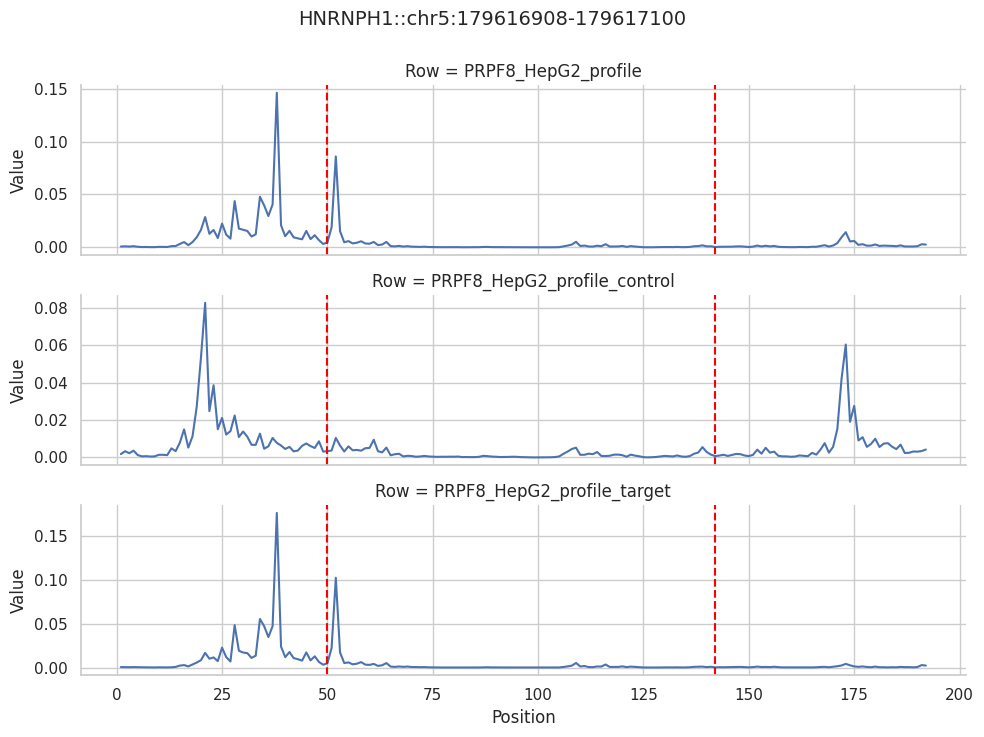

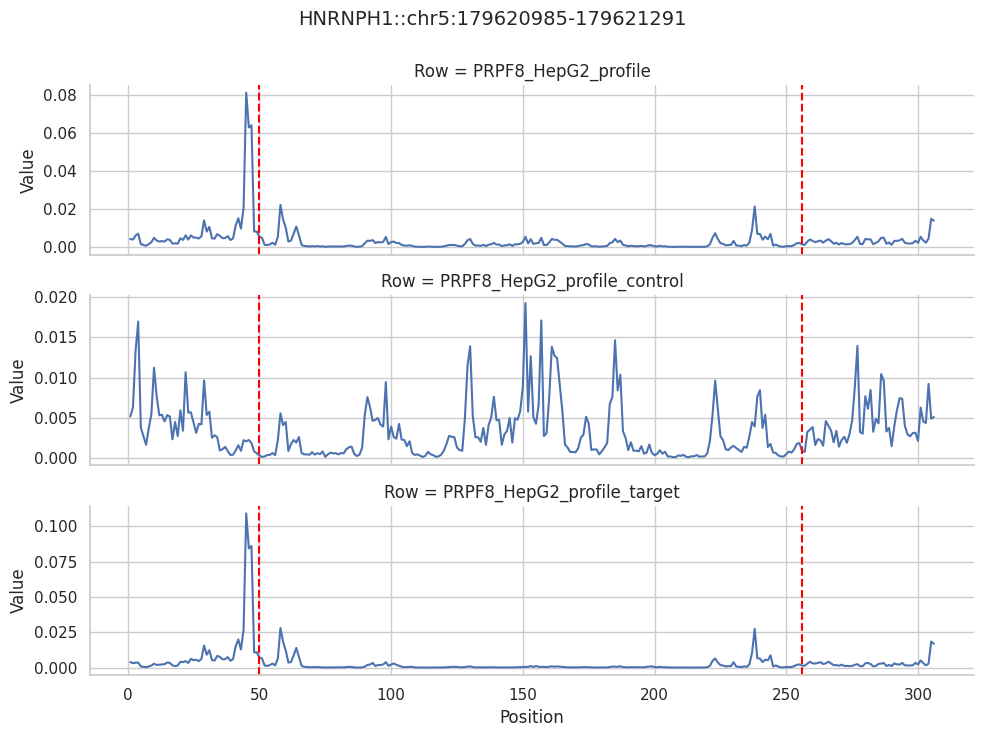

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Load TSV without reversing
def load_tsv(filepath):
    with open(filepath, 'r') as f:
        lines = [line.strip().split() for line in f.readlines()]
    return lines

# Map from row index to custom label
custom_row_labels = {
    2: "PRPF8_HepG2_profile",
    3: "PRPF8_HepG2_profile_control",
    4: "PRPF8_HepG2_profile_target"
}

# Build plotting dataframe
def prepare_plot_data(lines, label_prefix):
    plot_data = pd.DataFrame()
    for idx in range(2, 5):  # rows 3–5
        values = list(map(float, lines[idx]))
        temp_df = pd.DataFrame({
            'Position': range(1, len(values) + 1),
            'Value': values,
            'Row': custom_row_labels[idx]
        })
        plot_data = pd.concat([plot_data, temp_df], ignore_index=True)
    return plot_data

# File paths
file1_path = Path("pretrainPRPF8/HNRNPH1test1.tsv")
file2_path = Path("pretrainPRPF8/HNRNPH1test2.tsv")

# Load and prepare
data1 = load_tsv(file1_path)
data2 = load_tsv(file2_path)
df1 = prepare_plot_data(data1, "File1")
df2 = prepare_plot_data(data2, "File2")

# Plot File 1
sns.set(style="whitegrid")
g1 = sns.FacetGrid(df1, row="Row", sharey=False, height=2.5, aspect=4)
g1.map_dataframe(sns.lineplot, x="Position", y="Value")
for ax in g1.axes.flat:
    ax.axvline(x=50, color='red', linestyle='--')
    ax.axvline(x=142, color='red', linestyle='--')
g1.fig.suptitle("HNRNPH1::chr5:179616908-179617100", fontsize=14)
g1.fig.tight_layout()
g1.fig.subplots_adjust(top=0.88)
plt.show()

# Plot File 2
g2 = sns.FacetGrid(df2, row="Row", sharey=False, height=2.5, aspect=4)
g2.map_dataframe(sns.lineplot, x="Position", y="Value")
for ax in g2.axes.flat:
    ax.axvline(x=50, color='red', linestyle='--')
    ax.axvline(x=256, color='red', linestyle='--')
g2.fig.suptitle("HNRNPH1::chr5:179620985-179621291", fontsize=14)
g2.fig.tight_layout()
g2.fig.subplots_adjust(top=0.88)
plt.show()


In [ ]:
!rbpnet predict -m models/PRPF8_HepG2.model.h5 -o data/introns50seq.tsv --format fasta data/sequencescln.fa